In [24]:
%load_ext autoreload
%autoreload 2

In [3]:
from data.memory_dataset import MemoryData
from data.random_position_selector import RandomPartSelector
import torchvision.transforms.v2 as transforms
import torch
import matplotlib.pyplot as plt





In [26]:
import json
file = open("data/perspective/perspective.json")
j = json.load(file)

#prefix = "https://commons.wikimedia.org/wiki/Commons:Quality_images/Subject/Animals/Birds#/media/"
print(j["query"]["pages"])
images = j["query"]["pages"]["1705217"]["images"]
image_titles = list(set([image["title"] for image in images]))[:2]
print(len(image_titles))

{'1705217': {'pageid': 1705217, 'ns': 4, 'title': 'Commons:Quality images/Technical/Perspective', 'images': [{'ns': 6, 'title': 'File:0118 GER Kiel St Nikolai crucifix.jpg'}, {'ns': 6, 'title': 'File:0370 Meißen 11.11.2010.jpg'}, {'ns': 6, 'title': "File:0519 -France - Nice - Corner Rue de l'Abbaye and Rue Saint Vincent - looking up - HDR - VP.jpg"}, {'ns': 6, 'title': 'File:0 La Hestre - Drève de Mariemont (1).jpg'}, {'ns': 6, 'title': 'File:10 York Street and Ice Towers.jpg'}, {'ns': 6, 'title': 'File:12-04-06-senftenhuette-by-RalfR-14.jpg'}, {'ns': 6, 'title': 'File:12-07-12-wikimania-wdc-by-RalfR-010.jpg'}, {'ns': 6, 'title': 'File:13-04-13-st-poelten-landhausviertel-543.jpg'}, {'ns': 6, 'title': 'File:13-04-13-st-poelten-landhausviertel-628.jpg'}, {'ns': 6, 'title': 'File:13-06-27-rotterdam-by-RalfR-69.jpg'}, {'ns': 6, 'title': 'File:1402 Boulevard René-Lévesque Ouest, Montreal, QC.jpg'}, {'ns': 6, 'title': "File:15-10-27-Vista des de l'estàtua de Colom a Barcelona-WMA 2778.jpg"},

In [8]:

import subprocess
import requests

links = open("data/valued/link_list.txt").readlines()[2900:3399]
image_titles = ["File:" + link.split("File:")[1] for link in links]

output = open("data/valued/dl_links7.txt", "w")



for file in image_titles:
    url = 'https://api.wikimedia.org/core/v1/commons/file/' + file

    headers = {
        'User-Agent': 'c9po'
    }

    response = requests.get(url, headers=headers)
    data = response.json()
    output.write(data["original"]["url"] + "\n")
    print(file)
output.close()



File:H%C3%B4tel_de_pr%C3%A9fecture_de_la_Loire-Atlantique_-_Nantes.jpg

File:Prepona_laertes_laertes_MHNT.jpg

File:Mwamongu_water_source.jpg

File:Stylus_Instrument.svg

File:Photogram_Principle.svg

File:Priscacara_liops_Green_River_Formation.jpg

File:Pristella_maxillaris.jpg

File:Pristina_City_Park.jpg

File:Tachina_fly_Gonia_capitata_feeding_honey.jpg

File:ORP_Wdzydze.JPG

File:ORP_Grom_(korweta)_2.JPG

File:Promonturconchum_superbum_01.JPG

File:Prosartes_hookeri_2699.JPG

File:Fly_June_2008-5.jpg

File:Protaetia_fieberi_bilat.jpg

File:1gwe_antipar_betaSheet_both.png

File:Debrecen_-_Protestant_Great_Church.JPG

File:Protogrammoceras_depressum_01.JPG

File:Providence_City_Hall_2009.jpg

File:Prze%C5%82%C4%99cz_Karkonoska_-_panorama.jpg

File:The_Sunday_at_Home_1880_-_Psalm_23.jpg

File:Pseudimbrasia_deyrollei.jpg

File:Pseudoasaphus_praecurrens_MHNT.PAL.2003.439.jpg

File:Pseudocuma_longicorne.jpg

File:Pseudogrammoceras_expeditum_01.JPG

File:Pseudopanthera_macularia_MHNT.jpg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

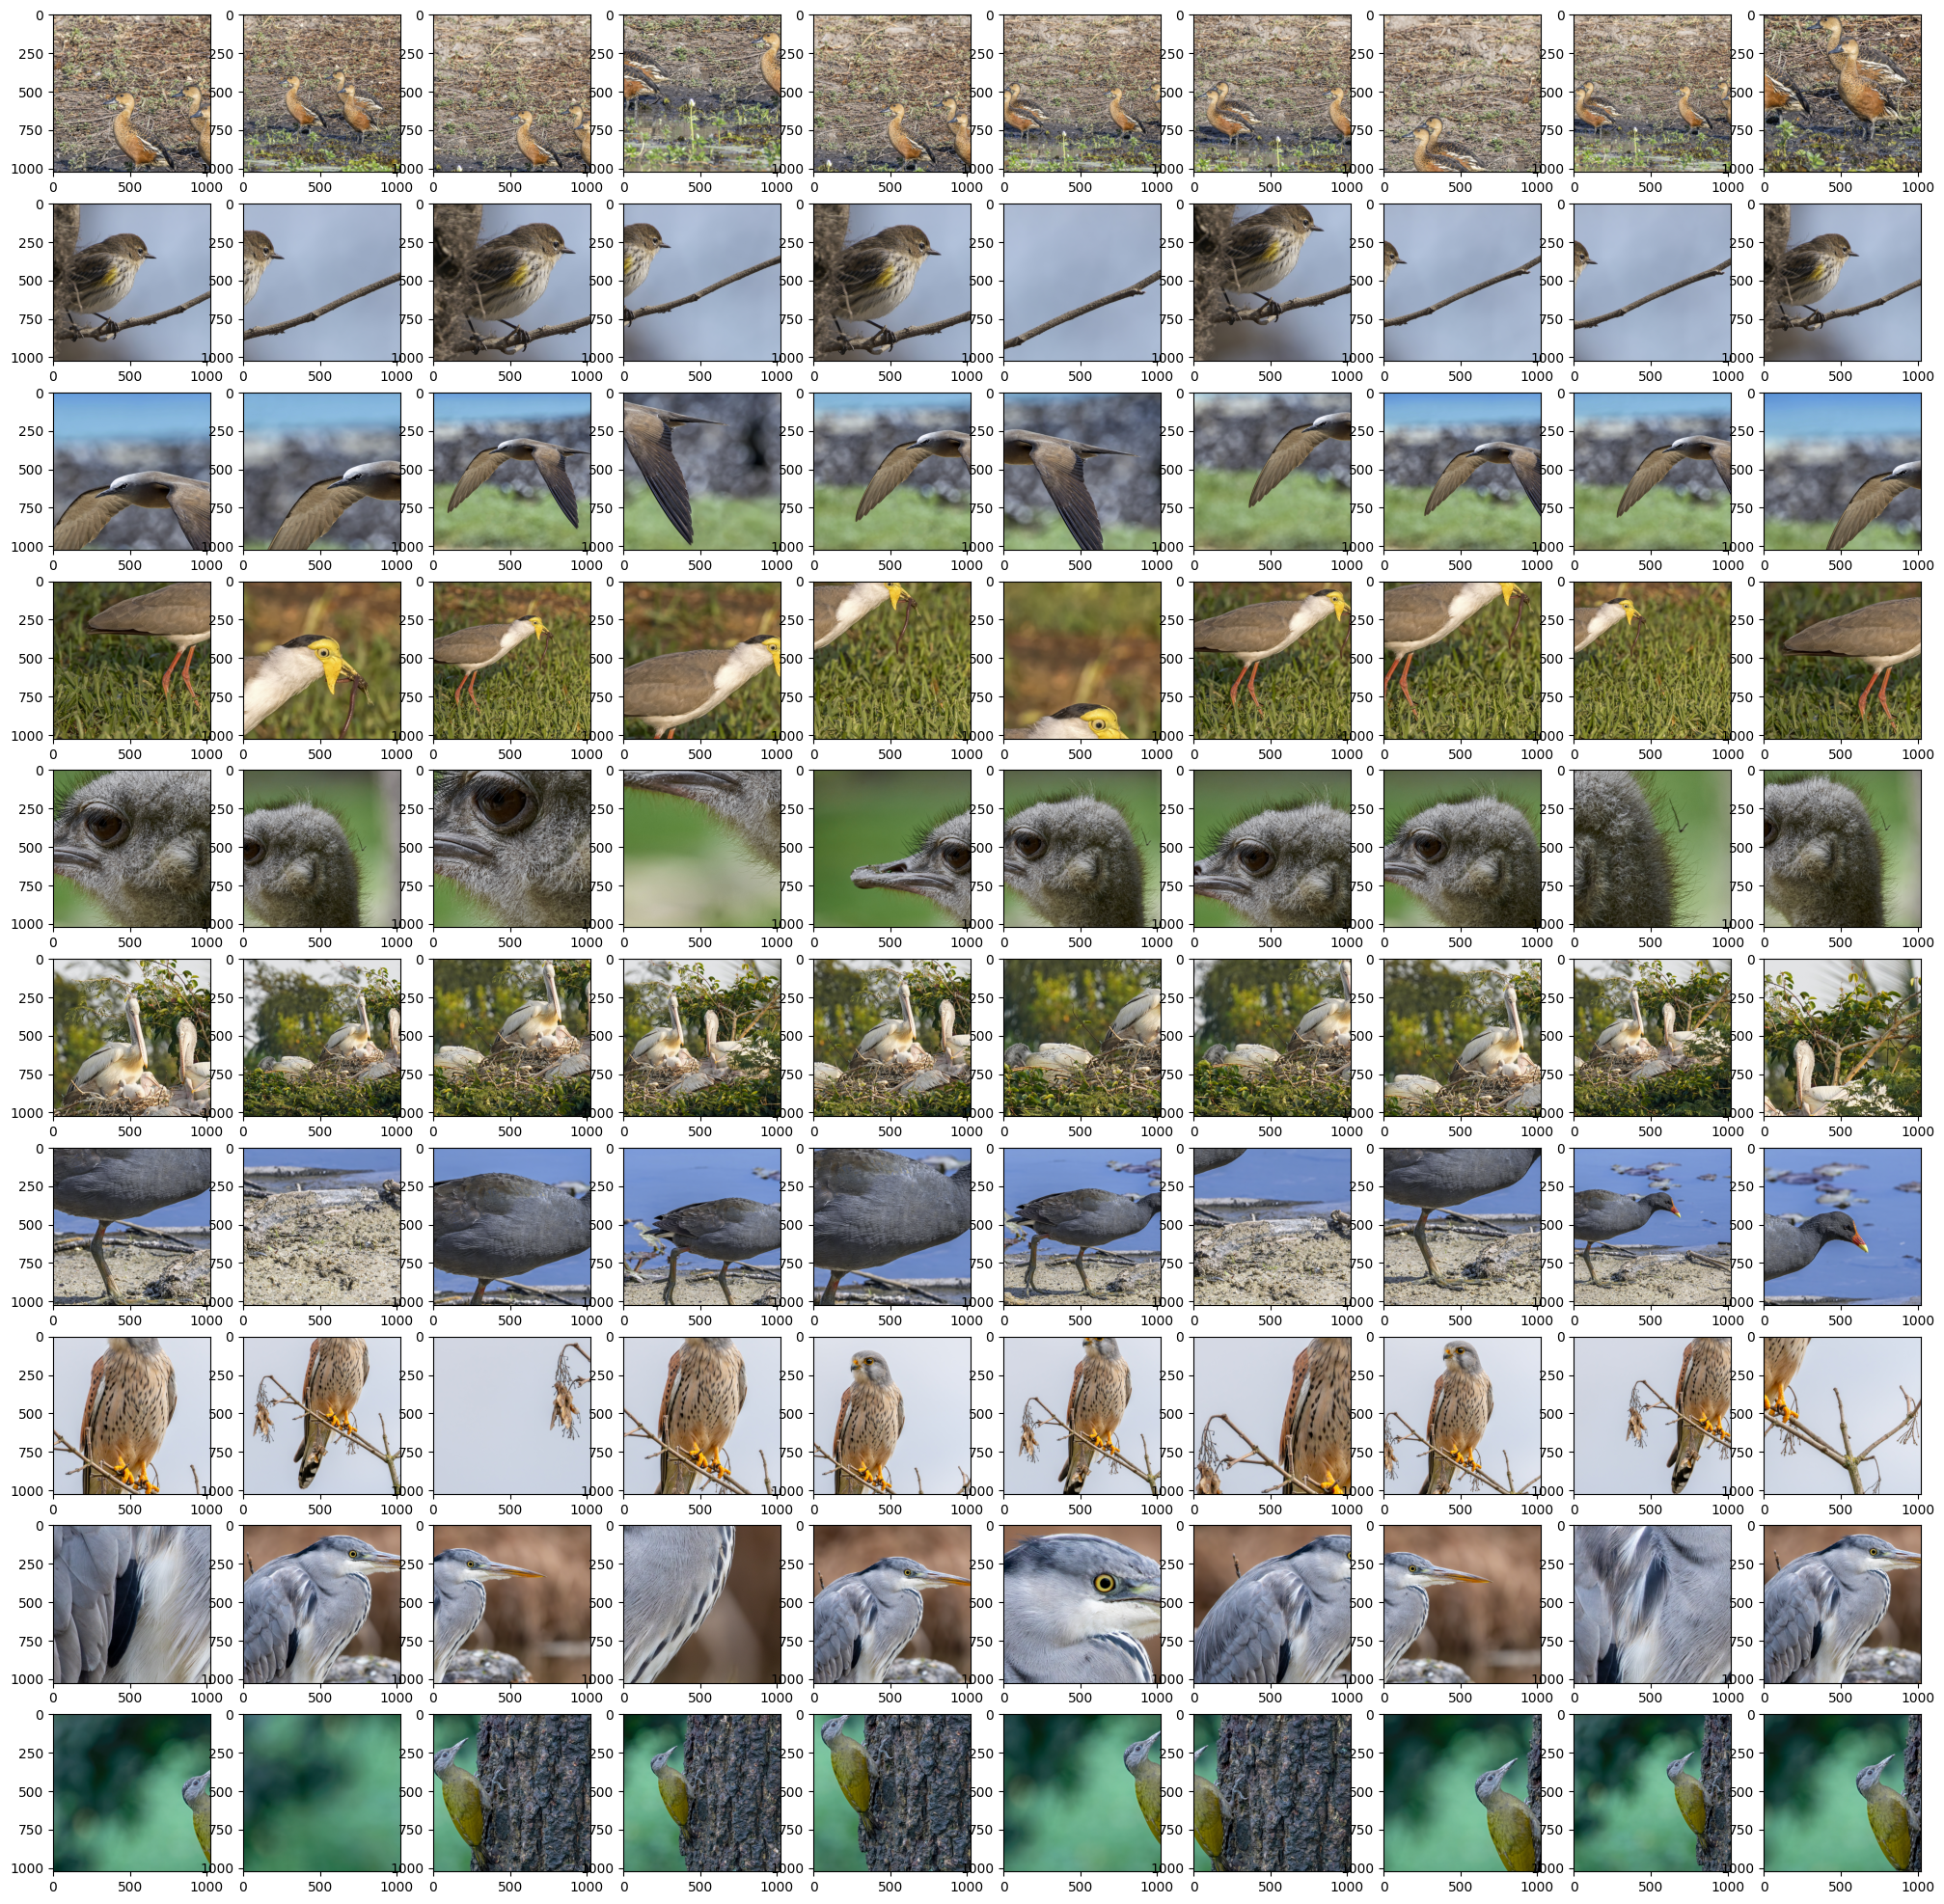

In [3]:
from data.memory_dataset import MemoryData
from data.random_position_selector import RandomPartSelector
import torchvision.transforms.v2 as transforms
import matplotlib.pyplot as plt
import torch

transform = transforms.Compose(
    [RandomPartSelector(),]
)

m = MemoryData("data/quality_birds", transform)

fig, axes = plt.subplots(10,10)
fig.set_size_inches(25,25)

for i in range(10):
    for j in range(10):
        image = m[i].cpu().permute(1,2,0)
        #print(image.shape)
        axes[i, j].imshow(image)

In [1]:
from bs4 import BeautifulSoup
file = open("data/valued/CVI.htm")
soup = BeautifulSoup(file.read())

In [2]:
out_file = open("data/valued/link_list.txt", "w")
import validators

for link in soup.findAll('a'):
    url = link.get("href")
    if url != None and ("jpg" in url or "JPG" in url or "png" in url or "PNG" in url):
        if "wiki/File:" in url:
            out_file.write(url + "\n")
    
out_file.close()

In [22]:
import requests
import json
file = open("data/valued/link_list.txt")
page_links = file.readlines()

dl_links = page_links[:399]

output = open("data/valued/dl_links1.txt", "w")



for url in dl_links:
    headers = {
        'User-Agent': 'c9po',
        'accept-encoding' : 'json'
    }
    filename = "File:" + url.split("File:")[1]
    print(filename)
    request = 'https://api.wikimedia.org/core/v1/commons/file/' + filename
    print(request)
    response = requests.get(url, headers=headers)
    print(str(response.content))
    data = json.loads(response.content)
    output.write(data["original"]["url"] + "\n")
output.close()



File:Anaea_archidona_(Male)_(2).jpg

https://api.wikimedia.org/core/v1/commons/file/File:Anaea_archidona_(Male)_(2).jpg

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>File:Coenophlebia archidona MHNT Satipo Peru male.jpg - Wikimedia Commons</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":true,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f2f43f35-294f-45d0-b70a-df89b62a9058","wgCanonicalNamespace":"File","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":6,"wgPageName":"File:Coenophlebia_archidona_MHNT_Satipo_Peru_male.jpg","wgTitle":"Coenophlebia archidona MHNT Satipo Peru male.jpg","wgCurRevisionId":863037605,"wgRevisionId":863037605,"wgArticleId":15407411,"wgIsArticle":true,"wgIsRedirect":

JSONDecodeError: Expecting value: line 1 column 1 (char 0)